## Formal Concept Analysis
The application of FCA provides a mathematical model for describing a set of objects (Company Name) with a set of properties (Sessions booked) which each of the objects either has the property or not. We aim to derive implicit relationship between 'Company Name' described through a set of multiple 'Sessions' booked (represented by Session Title). 

### Formal Context
The approach first maps a table called formal context that defines which companies have booked which sessions and vice versa. The mapping process only included the company which has booked more than one session.

In [1]:
import pandas as pd
from concepts import Context

In [2]:
col_names = ['Ses_1', 'Ses_2', 'Ses_3', 'Ses_4', 'Ses_5', 'Ses_6','Ses_7','Ses_8','Ses_9','Ses_10','Ses_11','Ses_12',
            'Ses_13','Ses_14','Ses_15','Ses_16','Ses_17','Ses_18','Ses_19','Ses_20','Ses_21','Ses_22','Ses_23',
            'Ses_24','Ses_25','Ses_26','Ses_27','Ses_29']
# load dataset
data = pd.read_csv("FCA_.csv", header=None, names=col_names)
data = data.iloc[1:]

In [3]:
data.head()
data.fillna("")

,Ses_1,Ses_2,Ses_3,Ses_4,Ses_5,Ses_6,Ses_7,Ses_8,Ses_9,Ses_10,...,Ses_19,Ses_20,Ses_21,Ses_22,Ses_23,Ses_24,Ses_25,Ses_26,Ses_27,Ses_29
1,Tadam Photography,,,,X,X,X,X,X,,...,,,,,,,,,,
2,Veiled Rebel,,X,X,X,X,X,,,,...,X,X,X,X,X,X,X,,,
3,Al-Istithmar National UK Limited,,,,,,,,,,...,,X,,,,,,,,
4,With Insight Education C.I.C,,,,,,,,,,...,,,,,,,X,,,
5,Tynify,,,,,,,,X,,...,,,,,,,,,,
6,Twenty5seven,,,,X,X,X,,,,...,,X,X,,X,,,,,
7,Lucid Rep Ltd,,,,,X,X,,,,...,,,,,,,,,,
8,Daria's Best Ltd,,X,,,,,,,,...,,,,,,,,,,
9,Fourteen Forty,,,,X,X,X,,X,,...,,,,X,,,,X,,
10,Julia Andrews Music,,,,,,,,,,...,,,,,X,,,,,


In [4]:
c = Context.fromfile("FCA_.csv", frmat='csv')
#dot = c.lattice.graphviz()
c

<Context object mapping 26 objects to 27 properties [13e2208a] at 0x121ad59b0>

### Concept Intent and Extent
The formal context table contains information on how 'Company names' and 'Session title' are related. From here, a query of common 'Session title' of multiple 'Company names' (intent) or common 'Company names' of 'Session title' (extent) could be derived. Example as below:

In [5]:
>>> c.intension(['Dalesway Print Technology', 'KIND2 Limited'])

('Ses_6', 'Ses_9', 'Ses_12', 'Ses_13', 'Ses_21')

In [6]:
>>> c.extension(['Ses_11', 'Ses_12'])

('Veiled Rebel',
 'Twenty5seven',
 'HHc',
 'Earth Changers',
 'Grime and Indie Pop Ltd')

In [7]:
c['Veiled Rebel','Tadam Photography']

(('Tadam Photography',
  'Veiled Rebel',
  'Twenty5seven',
  'Fourteen Forty',
  'Fit The Bill Limited'),
 ('Ses_5', 'Ses_6', 'Ses_7'))

### Formal Concept
The hierarchical ordered of the closest matching pair of 'Company names' to 'Session title' is denoted by Formal Concept. From the mapping of 26 companies to 27 sessions, 167 concepts are derived. The example of matching pair of sessions booked by:'HHc' and 'Fourteen Forty' are 'Ses_9', 'Ses_12', 'Ses_13', 'Ses_18', 'Ses_22'. The list of all 167 concepts is stored in "output.out' text file.

In [8]:
c['HHc','Fourteen Forty']

(('Fourteen Forty', 'HHc'), ('Ses_9', 'Ses_12', 'Ses_13', 'Ses_18', 'Ses_22'))

In [9]:
def printLog(*args, **kwargs):
    print(*args, **kwargs)
    with open('output.out','a') as file:
        print(*args, **kwargs, file=file)

#printLog('hello world')
for extent, intent in c.lattice:
    printLog('%r %r' % (extent, intent))

() ('Ses_1', 'Ses_2', 'Ses_3', 'Ses_5', 'Ses_6', 'Ses_7', 'Ses_8', 'Ses_9', 'Ses_10', 'Ses_11', 'Ses_12', 'Ses_13', 'Ses_14', 'Ses_15', 'Ses_16', 'Ses_17', 'Ses_18', 'Ses_19', 'Ses_20', 'Ses_21', 'Ses_22', 'Ses_23', 'Ses_24', 'Ses_25', 'Ses_26', 'Ses_27', 'Ses_29')
('Tadam Photography',) ('Ses_5', 'Ses_6', 'Ses_7', 'Ses_8', 'Ses_9')
('Veiled Rebel',) ('Ses_2', 'Ses_3', 'Ses_5', 'Ses_6', 'Ses_7', 'Ses_11', 'Ses_12', 'Ses_13', 'Ses_14', 'Ses_16', 'Ses_17', 'Ses_18', 'Ses_19', 'Ses_20', 'Ses_21', 'Ses_22', 'Ses_23', 'Ses_24', 'Ses_25')
("Daria's Best Ltd",) ('Ses_2', 'Ses_15')
('Fourteen Forty',) ('Ses_5', 'Ses_6', 'Ses_7', 'Ses_9', 'Ses_12', 'Ses_13', 'Ses_14', 'Ses_17', 'Ses_18', 'Ses_22', 'Ses_26')
('Oh So Social Limited',) ('Ses_5', 'Ses_7', 'Ses_8', 'Ses_10', 'Ses_11', 'Ses_16', 'Ses_18', 'Ses_20', 'Ses_21', 'Ses_22', 'Ses_27', 'Ses_29')
('Potters Business Support Ltd',) ('Ses_1', 'Ses_14', 'Ses_18', 'Ses_20', 'Ses_22', 'Ses_23', 'Ses_25')
('Blue wave swim school',) ('Ses_2', 'Ses_5'

('Veiled Rebel', 'Twenty5seven', 'Fourteen Forty', 'Fit The Bill Limited', 'Dalesway Print Technology') ('Ses_6', 'Ses_7', 'Ses_12')
('Veiled Rebel', 'Twenty5seven', 'Fourteen Forty', 'Blue wave swim school', 'Elevate Her Limited') ('Ses_5', 'Ses_17')
('Veiled Rebel', 'Twenty5seven', 'Fourteen Forty', 'Yogadmin', 'Elevate Her Limited') ('Ses_7', 'Ses_17')
('Veiled Rebel', 'Twenty5seven', 'Julia Andrews Music', 'Potters Business Support Ltd', 'Yogadmin') ('Ses_23',)
('Veiled Rebel', 'Twenty5seven', 'HHc', 'Earth Changers', 'Grime and Indie Pop Ltd') ('Ses_11', 'Ses_12')
('Veiled Rebel', 'Twenty5seven', 'KIND2 Limited', 'Roe Communications', 'Dalesway Print Technology') ('Ses_6', 'Ses_12', 'Ses_21')
('Veiled Rebel', 'Fourteen Forty', 'Yogadmin', 'Roe Communications', 'Grime and Indie Pop Ltd') ('Ses_6', 'Ses_22')
('Veiled Rebel', 'Fourteen Forty', 'HHc', 'Roe Communications', 'Grime and Indie Pop Ltd') ('Ses_12', 'Ses_18', 'Ses_22')
('Veiled Rebel', 'Blue wave swim school', 'SN Managemen

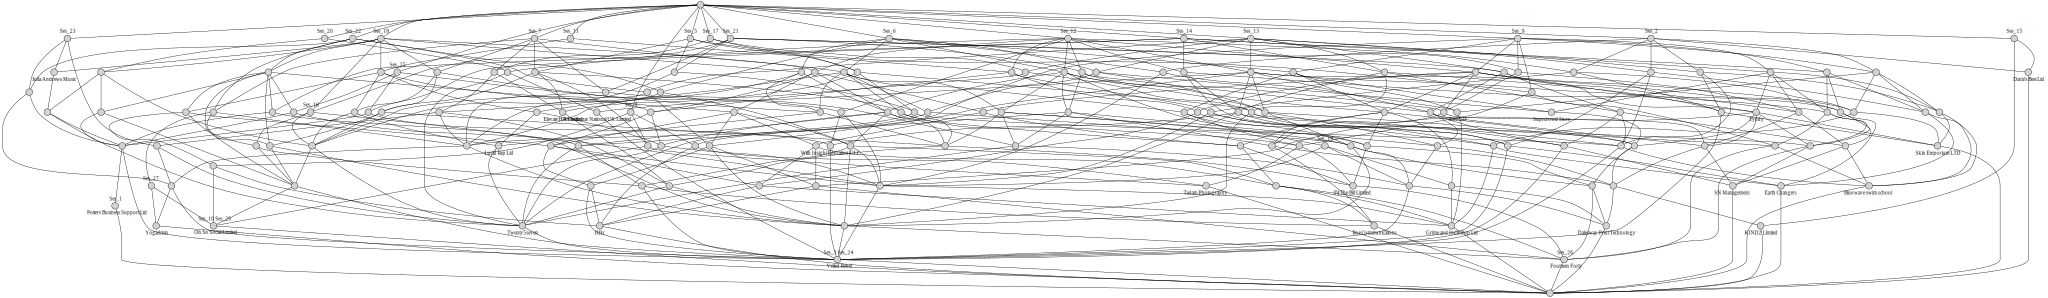

In [10]:
c.lattice.graphviz()

### The Concept Lattice 
The image is generated from ConExpt. The lattice of formal concepts, called Concept Lattice is generated using ConExpt software for a better view. From this lattice, we can derive its corresponding hierarchy of ontological concepts for sessions booked by companies.
<img src="Lattice.png" alt="Concept Lattice" title="Concept Lattice from ConExp" />

### Implication Basis
The ideas of the following section can be seen as a third approach to the data. Beside the formal context and the lattice diagram one can examine the implications between attributes valid in a context, derived from the Duquenne-Guigues-Basis. Implications have the following format:

#### No -Number of objects- Premise -- Conclusion

The snippet of list of implications derived as below


<img src="Implication_Sets.png" alt="Implication Set" title="Implication Set from ConExp" />

### Association Rules
This allow non-strict rules for association rules. If the premise of an association rule holds, the conclusion does not necessarily hold for all objects. However, it is true for some stated percentage of all objects covering the premise of rule. The base of association rules consists of two parts. Of course it includes the base of strict rules (Duquenne-Guigues-Basis) and additionally the base of approximate rules (so called Luxenburger base). Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships. Confidence indicates the number of times the if-then statements are found true. Association rules have the following format:

#### No -Number of objects, for which premise holds- Premise = [Rule confidence] -- -Number of objects, for which premise and conclusion holds- Conclusion

The snippet of list of association rules derived as below


<img src="Association_Rules.png" alt="Association Rules" title="Association Rules from ConExp" />

### What do we get from this?
The analysis provides a mathematical model for describing the relationship between a set of 'Company names' with a set of 'Session title'. From the analysis, a hierarchical model of concept lattice of the data can be used to build an ontological model. Whilst, the implications and association rules derived represents the if-then statements that help to show the probability of relationships between data items. These could be used to analyze data for patterns, or co-occurrence, in a database.